In [18]:
# Etapas

# 1.Padronizar a coluna "categoria" para minúsculas.
# 2.Remover registros onde a quantidade está ausente
# 3. Remover espaços extras e padronizar com primeira letra maiúscula (estilo título)
# 4. Garantir que a coluna data seja datetime
# 5. Calcular valor unitário real das vendas válidas
# 6. Calcular valor médio unitário por produto (sem considerar nulos)
# 7. Agrupar e calcular média
# 8. Preencher valor_unitario ausente
# 9. Recalcular valor_venda
# 10. Remover linhas em que 'produto' está vazio (13 linhas)
# 11. Analisar e remover linhas duplicadas (Nenhuma encontrada)
# 12. Salvar o novo DataFrame limpo em um novo arquivo Excel

# %pip install pandas matplotlib openpyxl numpy

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('vendas.xlsx')
display(df)

,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,ELETRODOMESTICOS,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,sazonal,Guarda-chuva,6.0,2866.20
2,2024-01-25,Vento Norte,roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,roupas,Casaco,5.0,1294.95
4,2024-05-29,Porto Sol,infantil,Blusa Infantil,NaN,NaN
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,eletrodomesticos,Ar-condicionado,1.0,293.93


In [19]:
# 1.Padronizar a coluna "categoria" para minúsculas.
df['categoria'].str.lower()
display(df)

,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,ELETRODOMESTICOS,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,sazonal,Guarda-chuva,6.0,2866.20
2,2024-01-25,Vento Norte,roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,roupas,Casaco,5.0,1294.95
4,2024-05-29,Porto Sol,infantil,Blusa Infantil,NaN,NaN
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,eletrodomesticos,Ar-condicionado,1.0,293.93


In [20]:
# 2.Remover registros onde a quantidade está ausente
df = df.dropna(subset=['quantidade'])
display(df)


,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,ELETRODOMESTICOS,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,sazonal,Guarda-chuva,6.0,2866.20
2,2024-01-25,Vento Norte,roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,roupas,Casaco,5.0,1294.95
5,2024-08-31,Porto Sol,sazonal,Manta térmica,2.0,957.96
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,eletrodomesticos,Ar-condicionado,1.0,293.93


In [21]:
# 3. Remover espaços extras e padronizar com primeira letra maiúscula (estilo título)
df['loja'] = df['loja'].str.title().str.strip()

df['categoria'] = df['categoria'].str.title().str.strip()

df['produto'] = df['produto'].str.title().str.strip()

display(df)

,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6.0,2866.20
2,2024-01-25,Vento Norte,Roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,Roupas,Casaco,5.0,1294.95
5,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2.0,957.96
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,Eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,Eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,Infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,Eletrodomesticos,Ar-Condicionado,1.0,293.93


In [22]:
# 4. Garantir que a coluna data seja datetime
df['data'] = pd.to_datetime(df['data'])
display(df)

,data,loja,categoria,produto,quantidade,valor_venda
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5.0,405.55
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6.0,2866.20
2,2024-01-25,Vento Norte,Roupas,Calça,8.0,3292.72
3,2024-07-10,Chuva Clara,Roupas,Casaco,5.0,1294.95
5,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2.0,957.96
...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,Eletrodomesticos,Ventilador,4.0,1545.72
496,2024-12-19,Vento Norte,Eletrodomesticos,Ventilador,1.0,230.89
497,2024-05-12,Vila Neve,Infantil,Blusa Infantil,6.0,441.30
498,2024-03-08,Vila Neve,Eletrodomesticos,Ar-Condicionado,1.0,293.93


In [23]:
# 5. Calcular valor unitário real das vendas válidas   E   8. Preencher valor_unitario ausente

# TESTE FILTRAGEM ADICIONAL PASSO 5
# filtrar valores e posteriormente duplicatas

# df_filtered = df[(df['produto'] == 'Lancheira') & (df['quantidade'] == 6)]

# duplicatasTeste5 = df_filtered[df_filtered.duplicated(subset=['produto', 'quantidade'], keep=False)]

# print(duplicatasTeste5)

df['valor_unitario'] = df['valor_venda'] / df['quantidade']

# Funcionalidade: organiza datas em ordem cronológica, separa os grupos de produto, e preenche com o valor acima "data mais próxima"
df.loc[df['valor_unitario'].isna(), 'valor_unitario']  = df.sort_values('data').groupby('produto')['valor_unitario'].ffill()

display(df.head(30))


,data,loja,categoria,produto,quantidade,valor_venda,valor_unitario
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5.0,405.55,81.11
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6.0,2866.20,477.70
2,2024-01-25,Vento Norte,Roupas,Calça,8.0,3292.72,411.59
3,2024-07-10,Chuva Clara,Roupas,Casaco,5.0,1294.95,258.99
5,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2.0,957.96,478.98
6,2024-09-20,Vila Neve,Infantil,Lancheira,2.0,605.24,302.62
7,2024-12-02,Porto Sol,Sazonal,Guarda-Chuva,10.0,3493.90,349.39
8,2024-11-11,Vila Neve,Infantil,Lancheira,5.0,2137.80,427.56
9,2024-10-22,Chuva Clara,Sazonal,Guarda-Chuva,7.0,547.33,78.19
10,2024-01-16,Porto Sol,Sazonal,NaN,9.0,4100.85,455.65


In [24]:
# 6. Calcular valor médio unitário por produto (sem considerar nulos)   E   7. Agrupar e calcular média
    # nulos 'valor_unitario' já resolvido em 5 e 8, nulos 'produto' já tratados automaticamente em groupby()
media_valor_unitario = df.groupby('produto')['valor_unitario'].mean()
print(media_valor_unitario)

produto
Aquecedor          206.730000
Ar-Condicionado    286.411250
Blusa Infantil     293.609706
Calça              272.692000
Camiseta           259.169600
Casaco             291.597879
Guarda-Chuva       269.500444
Lancheira          268.874419
Manta Térmica      257.628000
Mochila            300.222500
Protetor Solar     287.705909
Ventilador         292.471667
Vestido            301.499583
Name: valor_unitario, dtype: float64


In [25]:
# 8 FOI REALIZADA JUNTO COM 5

In [26]:
# 9. Recalcular valor_venda 
    # encontra casos em que 'valor_venda' estava vazio

# detalhe: busca por casos em que este calculo faria diferença
# df['valor_venda_duplicata'] = df['valor_venda']
# df['valor_venda_duplicata'] = df['quantidade'] * df['valor_unitario']
# alterados = df[df['valor_venda'] != df['valor_venda_duplicata']]

# print(alterados)

# remover coluna
# df = df.drop(columns='valor_venda_duplicata')


df['valor_venda'] = df['quantidade'] * df['valor_unitario']

In [27]:
# 10. Analisar e remover 'produto' vazios

# Exibir quantas linhas estão com 'produto' vazio
print(df['produto'].isna().sum())

# duplicatas1 = df[df['valor_unitario'].duplicated(keep=False)]
# display(duplicatas1)

# display(duplicatas)

# display(df[df['produto'].isna()])

# Por existirem apenas 13 produtos vazios, remover 'produtos' NaN
df = df.dropna(subset='produto')


13


In [28]:
# 11. Analisar e remover linhas duplicadas
print(df.duplicated().sum())

0


In [29]:
# 12. Salvar o novo DataFrame limpo em um novo arquivo Excel
display(df)
df.to_excel('vendas_tratadas.xlsx', index=False)

,data,loja,categoria,produto,quantidade,valor_venda,valor_unitario
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5.0,405.55,81.11
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6.0,2866.20,477.70
2,2024-01-25,Vento Norte,Roupas,Calça,8.0,3292.72,411.59
3,2024-07-10,Chuva Clara,Roupas,Casaco,5.0,1294.95,258.99
5,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2.0,957.96,478.98
...,...,...,...,...,...,...,...
495,2024-08-23,Porto Sol,Eletrodomesticos,Ventilador,4.0,1545.72,386.43
496,2024-12-19,Vento Norte,Eletrodomesticos,Ventilador,1.0,230.89,230.89
497,2024-05-12,Vila Neve,Infantil,Blusa Infantil,6.0,441.30,73.55
498,2024-03-08,Vila Neve,Eletrodomesticos,Ar-Condicionado,1.0,293.93,293.93


# Análise de Dados

In [30]:
# Etapas

# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
# 3. Agrupar por mês e somar vendas
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.
# 7. Plotar como gráfico de barras empilhadas

# matplotlib já importada

loja
Chuva Clara    181535.72
Porto Sol      151897.79
Vento Norte    164179.03
Vila Neve      156284.67
Name: valor_venda, dtype: float64


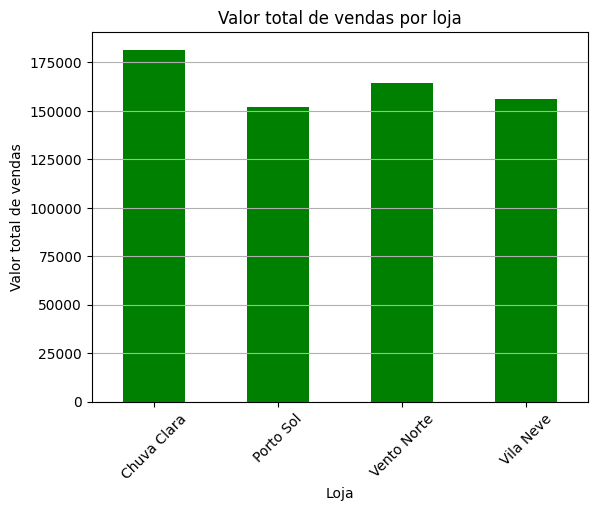

In [31]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
total_valor_vendas_loja = df.groupby('loja')['valor_venda'].sum()

print(total_valor_vendas_loja)

total_valor_vendas_loja.plot(kind='bar', color='green')
plt.title('Valor total de vendas por loja')
plt.xlabel('Loja')
plt.ylabel('Valor total de vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show() 


data_mensal
2024-01    56732.06
2024-02    45866.97
2024-03    72899.29
2024-04    44274.06
2024-05    53924.33
2024-06    56458.80
2024-07    51397.16
2024-08    49795.46
2024-09    65488.30
2024-10    53052.39
2024-11    62887.25
2024-12    41121.14
Freq: M, Name: valor_venda, dtype: float64


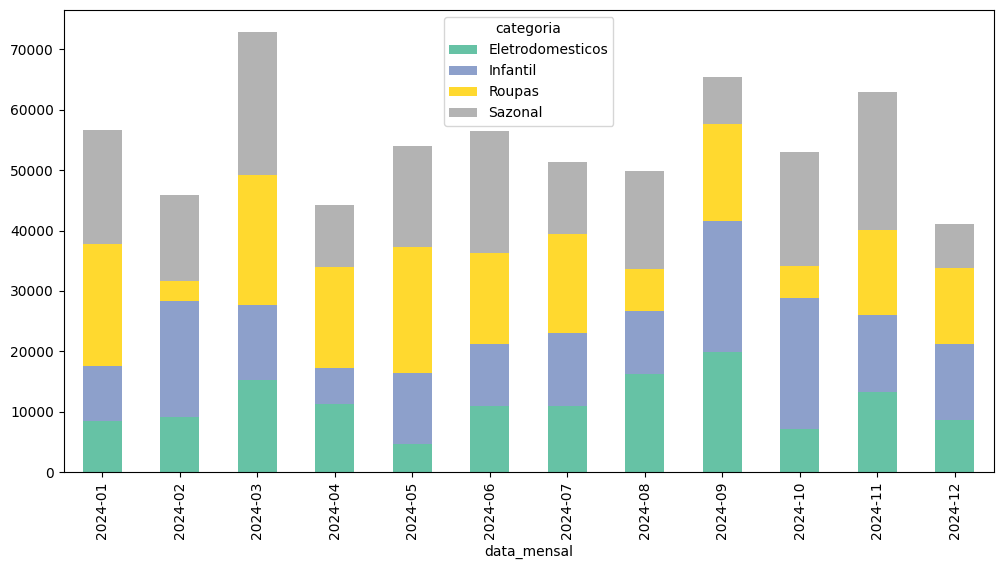

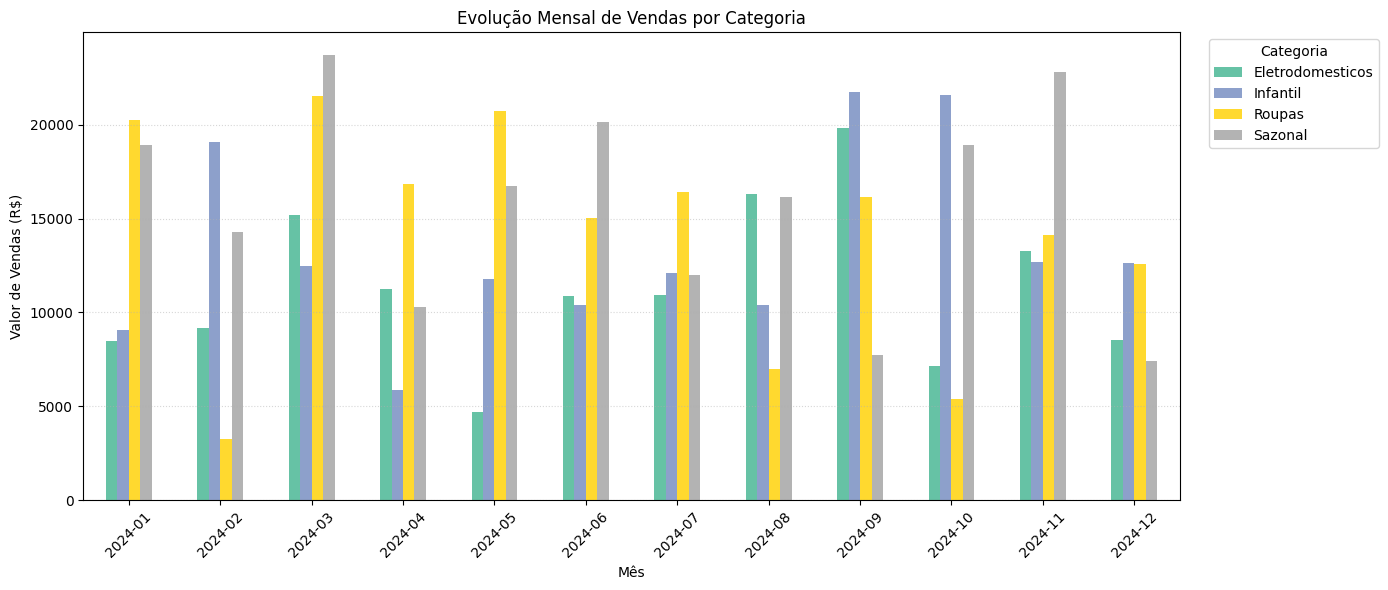

In [32]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
df_analise = df

df_analise['data_mensal'] = df_analise['data'].dt.to_period('M')

tab_vendas_mensais = df_analise.groupby(['data_mensal', ])['valor_venda'].sum()
print(tab_vendas_mensais)

# .UNSTACK() = desempilha os índices da tabela
# stacked=True = no grafico, empilha os valores em 1 coluna 
tab_vendas_mensais = df.groupby(['data_mensal', 'categoria'])['valor_venda'].sum().unstack()

# grafico empilhado
tab_vendas_mensais.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# grafico não empilhado
tab_vendas_mensais.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title("Evolução Mensal de Vendas por Categoria")
plt.xlabel("Mês")
plt.ylabel("Valor de Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend(title="Categoria", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [33]:
# 3. Agrupar por mês e somar vendas
soma_mensal_quantidade = df.groupby(df['data'].dt.to_period('M'))['quantidade'].sum()
soma_mensal_valor = df.groupby(df['data'].dt.to_period('M'))['valor_venda'].sum()
display(soma_mensal_quantidade, soma_mensal_valor)

data
2024-01    199.0
2024-02    175.0
2024-03    251.0
2024-04    167.0
2024-05    212.0
2024-06    211.0
2024-07    200.0
2024-08    229.0
2024-09    219.0
2024-10    190.0
2024-11    213.0
2024-12    156.0
Freq: M, Name: quantidade, dtype: float64

data
2024-01    56732.06
2024-02    45866.97
2024-03    72899.29
2024-04    44274.06
2024-05    53924.33
2024-06    56458.80
2024-07    51397.16
2024-08    49795.46
2024-09    65488.30
2024-10    53052.39
2024-11    62887.25
2024-12    41121.14
Freq: M, Name: valor_venda, dtype: float64